In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Завдання А

In [19]:
n = 1000
delta = 0.95
n_student = 9
n_group = 51

In [20]:
x = np.array([])
y = np.array([])
for i in range(n):
    x = np.append(x, i + np.random.rand() * n_student / n_group)
    y = np.append(y, n_student * np.random.rand() * x[-1] + n_group * np.random.rand() + n_group)

In [21]:
beta = ((x * y).mean() - x.mean() * y.mean()) / ((x**2).mean() - x.mean()**2)
alpha = y.mean() - beta * x.mean()

In [22]:
t = np.arange(x.min(), x.max(), 0.1)
z = alpha + beta * t

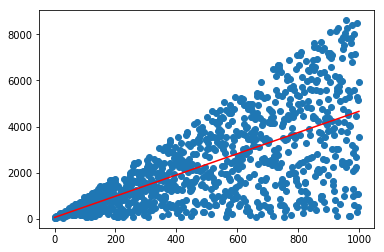

In [23]:
plt.scatter(x, y)
plt.plot(t, z, 'r');

In [24]:
print('α = {}, β = {}'.format(alpha, beta))
print('y = {} + {}x'.format(np.round(alpha, 3), np.round(beta, 3)))

α = 74.38007640966225, β = 4.5932101495215
y = 74.38 + 4.593x


Перевірим наявність викидів

In [25]:
e = y - (alpha + beta * x)
S_i_2 = ((e**2).sum() / (n - 2)) * (1 - (1 / n) - ((x - x.mean())**2) / ((x - x.mean())**2).sum())
R = (e / np.sqrt(S_i_2)).max()
R_delta = 4
if R > R_delta:
    print('Викиди є, протрібно їх викинути і провести оцінку спочатку')
    x, y = new_evaluation(x, y, e, S_i_2, R, R_delta)
else:
    print('Викидів нема')

Викидів нема


In [26]:
def new_evaluation(x, y, e, S_i_2, R, R_delta):
    while R > R_delta:
        index_del_element = np.where((e / np.sqrt(S_i_2)) == (e / np.sqrt(S_i_2)).max()) 
        x = np.delete(x, index_del_element)
        y = np.delete(y, index_del_element)
        beta = ((x * y).mean() - x.mean() * y.mean()) / ((x**2).mean() - x.mean()**2)
        alpha = y.mean() - beta * x.mean()
        e = y - (alpha + beta * x)
        S_i_2 = ((e**2).sum() / (n - 2)) * (1 - (1 / n) - ((x - x.mean())**2) / ((x - x.mean())**2).sum())
        R = (e / np.sqrt(S_i_2)).max()
    print('Викидів нема')
    return x, y

# Завдання Б

In [27]:
S_2 = ((y - alpha - beta * x)**2).sum() / (n - 2)
S_2_x = (((x - x.mean())**2).sum()) / (n - 1)
S_beta = np.sqrt(S_2) / (np.sqrt(S_2_x) * np.sqrt(n - 1))
t_delta = 1.645
if abs(beta) > t_delta * S_beta:
    print('Значення коефіцієнта b є значимим')
else:
    print('Значення коефіцієнта b є незначимим')

Значення коефіцієнта b є значимим


In [28]:
S_alpha = np.sqrt(S_2) * np.sqrt((1/n) + (x.mean()**2) / ((n-1) * S_2_x))
if abs(alpha) > t_delta * S_alpha:
    print('Значення коефіцієнта a є значимим')
else:
    print('Значення коефіцієнта a є незначимим')

Значення коефіцієнта a є незначимим


In [29]:
S_2_y = (((y - y.mean())**2).sum()) / (n - 1)
F_delta = 1
if S_2 / S_2_y < F_delta:
    print('Модель адекватна')
else:
    print('Модель не адекватна')

Модель адекватна


# Звдання В

In [30]:
z_1 = np.polyfit(x, y, 1)
z_2 = np.polyfit(x, y, 2)
z_3 = np.polyfit(x, y, 3)
linear_approximation = np.poly1d(z_1)
quadratic_approximation = np.poly1d(z_2)
cubic_approximation = np.poly1d(z_3)
print('Лінійна апрксимація:\n {}\n'.format(linear_approximation))
print('Квадратична апроксимація:\n {}\n'.format(quadratic_approximation))
print('Кубічна апрксимація:\n {}'.format(cubic_approximation))

Лінійна апрксимація:
  
4.593 x + 74.38

Квадратична апроксимація:
             2
-0.0001157 x + 4.709 x + 55.15

Кубічна апрксимація:
             3            2
-1.127e-06 x + 0.001573 x + 4.034 x + 111.2


In [31]:
S_2_1 = ((y - linear_approximation(x))**2).sum() / (n - 2)
S_2_2 = ((y - quadratic_approximation(x))**2).sum() / (n - 2)
S_2_3 = ((y - cubic_approximation(x))**2).sum() / (n - 2)
print('S_2 для лінійної апрксимації: {}'.format(S_2_1))
print('S_2 для квадратичної апрксимації: {}'.format(S_2_2))
print('S_2 для кубічної апрксимації: {}'.format(S_2_3))

S_2 для лінійної апрксимації: 2189550.7085100426
S_2 для квадратичної апрксимації: 2189476.212654612
S_2 для кубічної апрксимації: 2189021.6904433765


Судячи позначеннях S_2 для кожного виду апроксимації можна зробити висновок, що найкраще з завданням вораась кубічна апроксимація

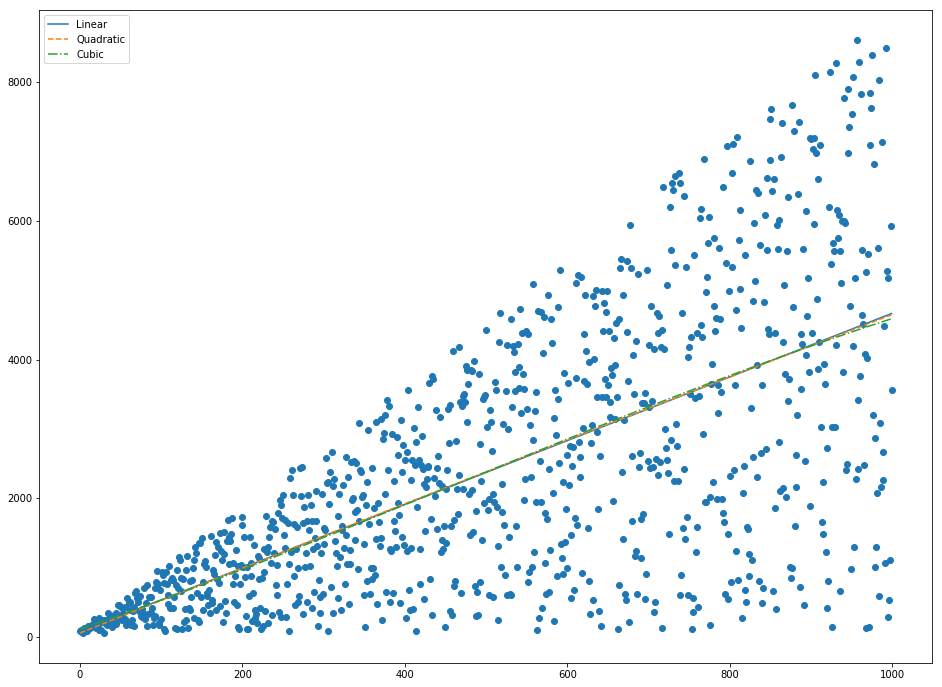

In [32]:
plt.figure(figsize=(16, 12))
plt.scatter(x, y)
plt.plot(x, linear_approximation(x),'-', label='Linear')
plt.plot(x, quadratic_approximation(x), '--', label='Quadratic')
plt.plot(x, cubic_approximation(x), '-.',label='Cubic')
plt.legend();

    опис функцій які знаходять коефіцієнки регресї (в тому числі множинна регресія)

In [16]:
def func(a, b, x):
    return a * np.sin(x) + b

In [17]:
scipy.optimize.curve_fit(func, x, y)

NameError: name 'scipy' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
n_group = 11

In [29]:
x = np.arange(1, 11)
y = n_group + np.array([4.2, 6.1, 7.9, 10.2, 12.1, 13.8, 16.2, 18, 20.2, 21.5])

In [30]:
z_1 = np.polyfit(x, y, 1)
z_2 = np.polyfit(x, y, 2)
z_3 = np.polyfit(x, y, 3)
linear_approximation = np.poly1d(z_1)
quadratic_approximation = np.poly1d(z_2)
cubic_approximation = np.poly1d(z_3)
print('Лінійна апрксимація:\n {}\n'.format(linear_approximation))
print('Квадратична апроксимація:\n {}\n'.format(quadratic_approximation))
print('Кубічна апрксимація:\n {}'.format(cubic_approximation))

Лінійна апрксимація:
  
1.967 x + 13.2

Квадратична апроксимація:
            2
-0.007197 x + 2.046 x + 13.04

Кубічна апрксимація:
            3          2
-0.005963 x + 0.0912 x + 1.593 x + 13.55


ERROR:root:Line magic function `%R` not found.


In [72]:
N=1000 #3000, 100

In [73]:
x = 15*np.sin(2*np.pi*np.arange(N)/N)+30*np.cos(4*np.pi*np.arange(N)/N)

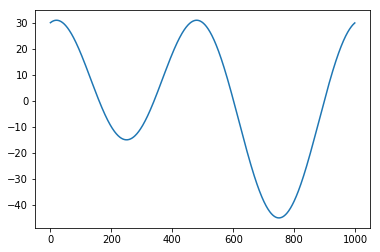

In [74]:
plt.plot(np.arange(N), x);

In [46]:
110/51


2.156862745098039

In [48]:
16*7/51

2.196078431372549

In [51]:
def f1(x, y):
    return (x+10)*10/y
def f2(x, y):
    return (x+15)*7/y
def f3(x, y):
    return (x+20)*5/y

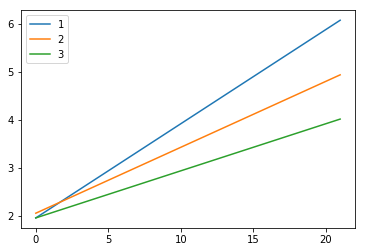

In [55]:
plt.plot(np.arange(22), f1(np.arange(22), 51), label='1')
plt.plot(np.arange(22), f2(np.arange(22), 51), label='2')
plt.plot(np.arange(22), f3(np.arange(22), 51), label='3')
plt.legend();

In [56]:
f1(1, 51), f2(1, 51), f3(1, 51)

(2.156862745098039, 2.196078431372549, 2.0588235294117645)